# Evaluate your ML Model using a ROC Curve

After training your machine learning model, you can test its performance over various threshold settings using an ROC (Receiver Operating Characteristics) curve. You can thus also choose the threshold that best fits your application. The curve uses two important metrics: the true positive rate (TPR) and the false positive rate (FPR), along with a variable: the threshold. While this method is very useful, it is limited to classification problems where your model outputs a class probability.

In [ ]:
# Load packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, plot_roc_curve, auc
%config InlineBackend.figure_format = 'retina'



#load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, plot_roc_curve, auc
%config InlineBackend.figure_formate = 'retina'

In [ ]:
# Upload your data as CSV and load as data frame
df = pd.read_csv("ROC_data.csv")
df.head()

,PROBABILITY,ACTUAL_LABEL
0,0.95,1
1,0.03,0
2,0.87,1
3,0.88,1
4,0.97,1


PROBABILITY: the predicted output of the model.  
ACTUAL_LABEL: the actual label of the test record.  

First, we will visualize this dataset. This shows us that there will not be a perfect threshold; there is overlap between the datapoints and can thus not be seperated with one vertical line.

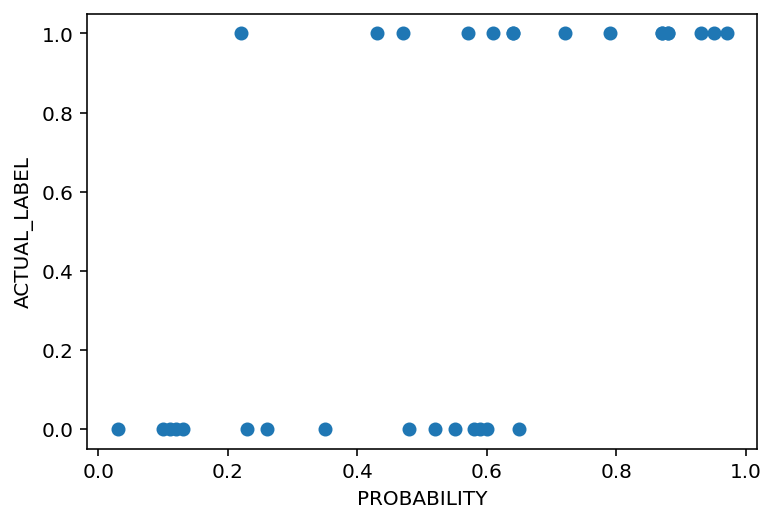

In [ ]:
plt.scatter(df['PROBABILITY'], df['ACTUAL_LABEL'])
plt.ylabel('ACTUAL_LABEL')
plt.xlabel('PROBABILITY')
plt.show()

Now, we will plot the ROC curve using the scikit-learn's function `roc_curve`.

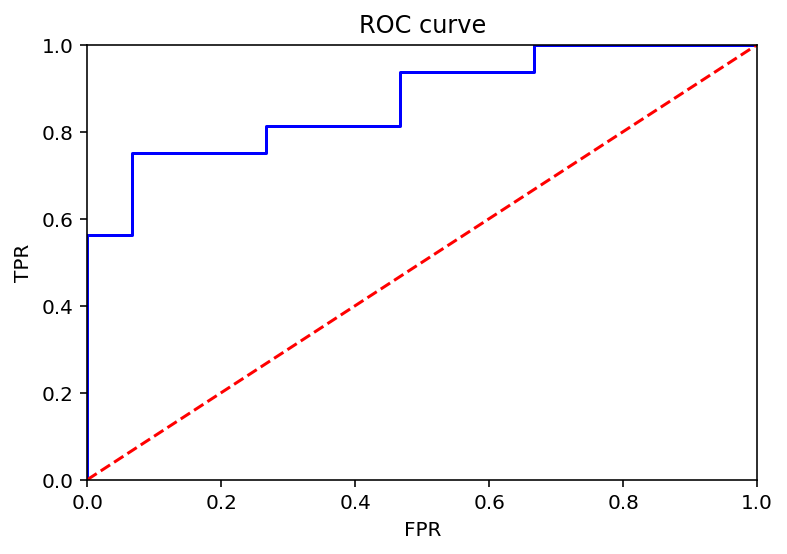

Area Under ROC Curve: 0.871


In [ ]:
preds = df['PROBABILITY']                          # Extract the output of our model from the data
y_test = df['ACTUAL_LABEL']                        # Extract the correct label from the data
fpr, tpr, threshold = roc_curve(y_test, preds)     # Using the `roc_curve' function from scikit-learnm calculate the FPRs, TPRs and thresolholds
roc_auc = auc(fpr, tpr)                            # Calculate the AUROC (Area Under ROC Curve)

plt.title('ROC curve')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')                     # Plot a straight line, which indicates random guessing
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()
print("Area Under ROC Curve: %.3f"% roc_auc)

The red line indicates the TPR and FPR when we would perform random guessing. Luckily the model, which is indicated by the blue line, is above the red line and thus always better.  
You can now choose what threshold best suits your application.   
Example:
For illness diagnosis, you want to be as cautious as possible. A very high TPR is thus necessary to always correctly identify sick people.
For spam detection, it is the other way around: we don't want important mails to end up in our spam.  


Finally, we see that the AUROC of our model is 0.871. For reference: a perfect model has AUROC 1, while random guessing will have an AUROC of 0.5.